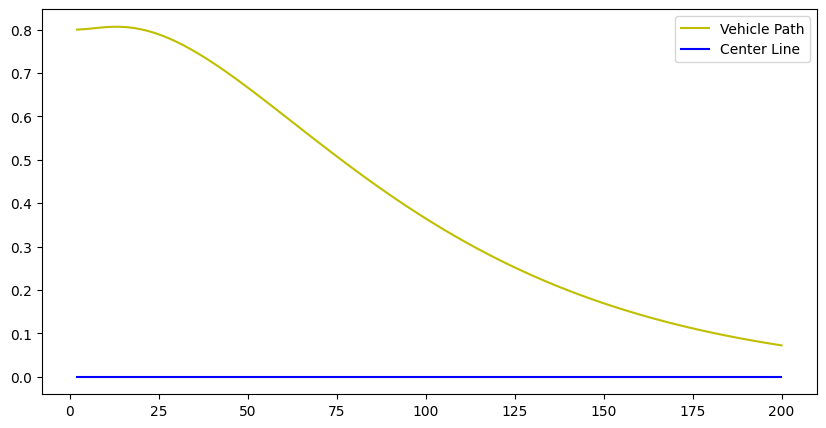

In [27]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt


class Vehicle(object):

    #intialial position of vehicle
    def __init__(self, x=0.0, y=0.0, angle= 0.0, length=50.0):
        self.difference_distance = 0.0
        self.difference_rotation = 0.0
        self.difference_drift = 0.0
        self.length = length

        #setting coordinates of vehicle
    def set(self, x, y, angle):

        self.x = x
        self.y = y
        self.angle = angle % (2.0 * np.pi)

    def set_difference(self, difference_rotation, difference_distance):
        self.difference_distance = difference_distance
        self.difference_rotation = difference_rotation

    def set_difference_drift(self, drift):
        self.difference_drift = drift

    #steering = angle of front wheel

    def drive(self, steering, distance, tolerance=0.001, max_allowed_steering =np.pi / 4.0):
         if steering > max_allowed_steering:
            steering = max_allowed_steering
         if steering < -max_allowed_steering:
            steering = -max_allowed_steering
         if distance < 0.0:
            distance = 0.0

         steering2 = random.gauss(steering, self.difference_rotation)
         distance2 = random.gauss(distance, self.difference_distance)

         steering2 += self.difference_drift

         rotate = np.tan(steering2 * distance2 / self.length)
         if abs(rotate) < tolerance:
            
            self.x += distance2 * np.cos(self.angle)
            self.y += distance2 * np.sin(self.angle)
            self.angle = (self.angle + rotate) % (2.0 * np.pi)
         else: 
            radius = distance2 / rotate
            cx = self.x - (np.sin(self.angle) * radius)
            cy = self.y + (np.cos(self.angle) * radius)
            self.angle = (self.angle + rotate) % (2.0 * np.pi)
            self.x = cx + (np.sin(self.angle) * radius)
            self.y = cy - (np.cos(self.angle) * radius)

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.angle)

vehicle = Vehicle()
vehicle.set(0, 0.8, 0)
vehicle.set_difference_drift(10/180.*np.pi)  # add drift bias

def run(vehicle, wp, wd, wi, n=100, speed=2.0):
    x_trajectory = []
    y_trajectory = []
    
    prev_cte = vehicle.y
    sum_cte = 0
    for _ in range(n):
        sum_cte += vehicle.y
        dev = vehicle.y - prev_cte
        prev_cte = vehicle.y
        steer = -wp * vehicle.y - wd * dev - wi*sum_cte
        vehicle.drive(steer, speed)
        x_trajectory.append(vehicle.x)
        y_trajectory.append(vehicle.y)
        
    return x_trajectory, y_trajectory


x_trajectory, y_trajectory = run(vehicle, 0.2, 3.0, 0.004)
n = len(x_trajectory)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.plot(x_trajectory, y_trajectory, 'y', label='Vehicle Path')
ax1.plot(x_trajectory, np.zeros(n), 'b', label='Center Line')
plt.legend()
